## Gradient Descent & Batch Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gd_regressor(X, y, learning_rate=0.0001, n_epochs=10000):
    m = len(X)
    
    theta = np.random.randn(2, 1)
    theta_path_gd = []  
    loss_path_gd = []  
    X_b = np.c_[np.ones((m, 1)), X]  #add a bias term to each instance

    for epoch in range(n_epochs):
        gradients = X_b.T.dot(X_b.dot(theta) - y)/m
        theta = theta - learning_rate * gradients

        theta_path_gd.append(theta.copy())  #copy theta to avoid modifying the original array
        loss = np.mean((X_b.dot(theta) - y) ** 2)
        loss_path_gd.append(loss)

    return theta, theta_path_gd, loss_path_gd

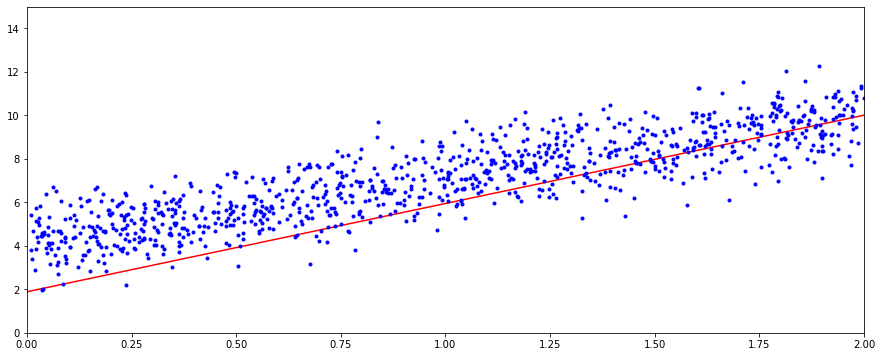

In [2]:
#generate data
np.random.seed(42)
m = 1000 
X = 2 * np.random.rand(m, 1)  
y = 4 + 3 * X + np.random.randn(m, 1) 

theta_gd, theta_path_gd, loss_path_gd = gd_regressor(X, y)
#call gd_regressor:
theta_gd, _, _ = gd_regressor(X, y)

#predict:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]
y_predict = x_new_b.dot(theta_gd)

#plot graph:
plt.figure(figsize=(15, 6))
plt.plot(x_new, y_predict, 'r-')  #predicted line
plt.plot(X, y, 'b.')  #original data points
plt.axis([0, 2, 0, 15])
plt.show()

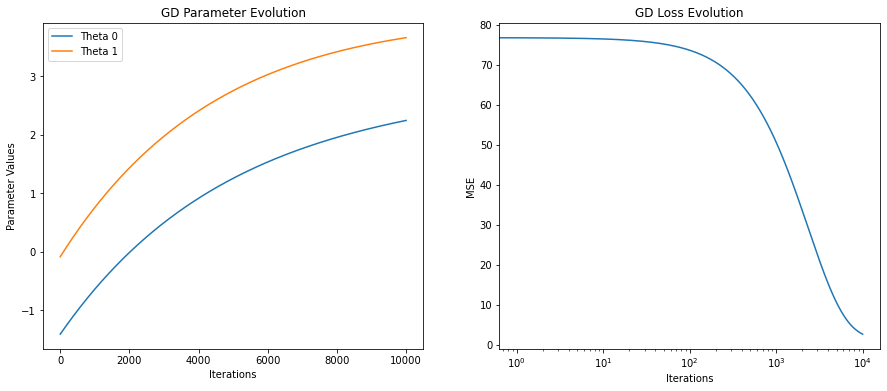

In [3]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)

theta_0_values = [theta[0, 0] for theta in theta_path_gd]
theta_1_values = [theta[1, 0] for theta in theta_path_gd]

plt.plot(theta_0_values, label='Theta 0')
plt.plot(theta_1_values, label='Theta 1')

#plot parameter evolution
plt.title('GD Parameter Evolution')
plt.xlabel('Iterations')
plt.ylabel('Parameter Values')
plt.legend()

#plot loss evolution
plt.subplot(1, 2, 2)
plt.plot(loss_path_gd)
plt.title('GD Loss Evolution')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.xscale("log")
plt.show()

## Mini-Batch Gradient Descent

In [4]:
def minibatch_regressor(X, y, learning_rate=0.0001, n_epochs=10000, batch_size=10):
    m = len(X)
    X_b = np.c_[np.ones((m, 1)), X]
    theta = np.random.randn(2, 1)
    num_batches = int(m / batch_size)

    theta_path_minibatch = [] 
    loss_path_minibatch = []   

    for epoch in range(n_epochs):
        for _ in range(num_batches):
            random_index = np.random.randint(m - batch_size)  
            xi_batch = X_b[random_index:random_index + batch_size]
            yi_batch = y[random_index:random_index + batch_size]

            gradients = 2 * xi_batch.T.dot(xi_batch.dot(theta) - yi_batch) / batch_size
            theta = theta - learning_rate * gradients

            # Keep track of the evolution of theta and loss
            theta_path_minibatch.append(theta.copy())
            loss = np.mean((X_b.dot(theta) - y) ** 2)
            loss_path_minibatch.append(loss)

    return theta, theta_path_minibatch, loss_path_minibatch

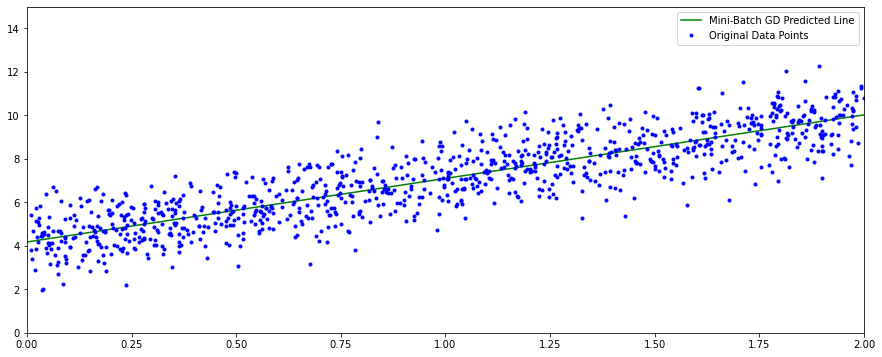

In [5]:
#generate data
np.random.seed(42)
m = 1000 
X = 2 * np.random.rand(m, 1)  
y = 4 + 3 * X + np.random.randn(m, 1) 

#mini-batch GD:
theta_minibatch, _, _ = minibatch_regressor(X, y)

#plot:
plt.figure(figsize=(15, 6))
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]

#predicted line&original data 
y_predict_minibatch = x_new_b.dot(theta_minibatch)
plt.plot(x_new, y_predict_minibatch, 'g-', label='Mini-Batch GD Predicted Line')
plt.plot(X, y, 'b.', label='Original Data Points')
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

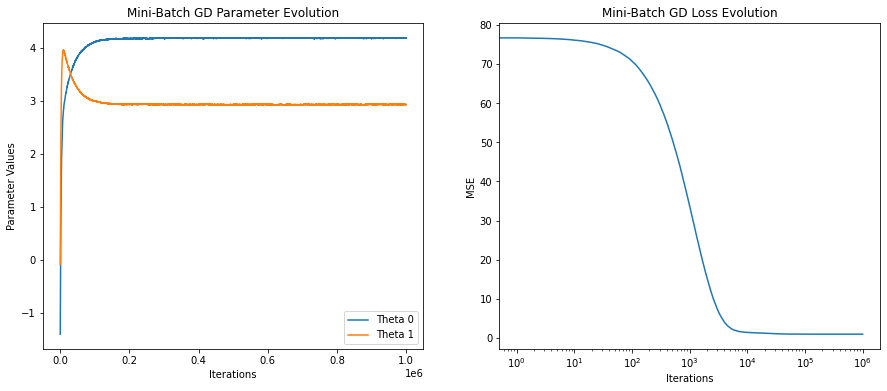

In [6]:
#generate data
np.random.seed(42)
m = 1000 
X = 2 * np.random.rand(m, 1)  
y = 4 + 3 * X + np.random.randn(m, 1) 

#call minibatch_regressor:
theta_minibatch, theta_path_minibatch, loss_path_minibatch = minibatch_regressor(X, y)

#plot parameter evolution
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)

#extract individual parameter
theta_0_values = [theta[0, 0] for theta in theta_path_minibatch]
theta_1_values = [theta[1, 0] for theta in theta_path_minibatch]

plt.plot(theta_0_values, label='Theta 0')
plt.plot(theta_1_values, label='Theta 1')

plt.title('Mini-Batch GD Parameter Evolution')
plt.xlabel('Iterations')
plt.ylabel('Parameter Values')
plt.legend()

#plot loss evolution
plt.subplot(1, 2, 2)
plt.plot(loss_path_minibatch)
plt.title('Mini-Batch GD Loss Evolution')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.xscale("log")
plt.show()